In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GITHUB csv data


In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183445,183572,183687,183908,184038,184224,184360,184473,184587,184819
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266424,266445,266487,266542,266591,266654,266700,266772,266839,266916
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,45061,45061,45061,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,101901,102209,102209,102209,102209,102301,102301,102301,102301


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'India',
              'Australia',
              'Japan'
             ] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

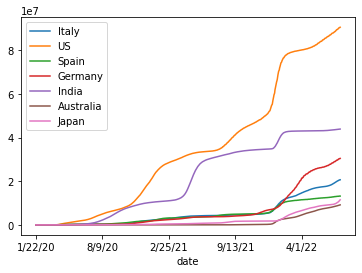

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,Australia,Japan
0,1/22/20,0,1,0,0,0,0,2
1,1/23/20,0,1,0,0,0,0,2
2,1/24/20,0,2,0,0,0,0,2
3,1/25/20,0,2,0,0,0,0,2
4,1/26/20,0,5,0,0,0,4,4


In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,Australia,Japan
0,2020-01-22,0,1,0,0,0,0,2
1,2020-01-23,0,1,0,0,0,0,2
2,2020-01-24,0,2,0,0,0,0,2
3,2020-01-25,0,2,0,0,0,0,2
4,2020-01-26,0,5,0,0,0,4,4


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [16]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183445,183572,183687,183908,184038,184224,184360,184473,184587,184819
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266424,266445,266487,266542,266591,266654,266700,266772,266839,266916
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,45061,45061,45061,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,101901,102209,102209,102209,102209,102301,102301,102301,102301


In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,183445,183572,183687,183908,184038,184224,184360,184473,184587,184819
1,no,Albania,0,0,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,no,Algeria,0,0,0,0,0,0,0,0,...,266424,266445,266487,266542,266591,266654,266700,266772,266839,266916
3,no,Andorra,0,0,0,0,0,0,0,0,...,44671,44671,45061,45061,45061,45326,45326,45326,45326,45326
4,no,Angola,0,0,0,0,0,0,0,0,...,101901,101901,102209,102209,102209,102209,102301,102301,102301,102301


In [19]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()


,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [20]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [21]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [22]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [23]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [24]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date state country  confirmed
259905 2022-07-21    no      US   90200438
260190 2022-07-22    no      US   90367064
260475 2022-07-23    no      US   90390185
260760 2022-07-24    no      US   90410386
261045 2022-07-25    no      US   90567290


## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [25]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,17037,17037,17127,17186,17203,17232,17268,17268,17268,17349
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,60478,60478,60775,60903,61003,61127,61268,61268,61268,61519
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6092,6092,6138,6153,6168,6192,6205,6205,6205,6244
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6825,6825,6841,6850,6857,6872,6882,6882,6882,6909
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15699,15699,15747,15762,15791,15816,15846,15846,15846,15898


In [26]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()


In [27]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [28]:
# update the large relational file

In [29]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [30]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [31]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [32]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

              date    state country  confirmed
260144  2020-01-22  Alabama      US          0
260145  2020-01-22  Alabama      US          0
260146  2020-01-22  Alabama      US          0
260147  2020-01-22  Alabama      US          0
260148  2020-01-22  Alabama      US          0
...            ...      ...     ...        ...
3321411 2022-07-25  Wyoming      US      11148
3321412 2022-07-25  Wyoming      US       5926
3321413 2022-07-25  Wyoming      US          0
3321414 2022-07-25  Wyoming      US       2545
3321415 2022-07-25  Wyoming      US       1726

[3061272 rows x 4 columns]


### cross check on full sum US data

In [33]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [34]:

check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
...,...,...
2022-07-21,US,90200438
2022-07-22,US,90367064
2022-07-23,US,90390185
